# Lab 0: Hello Qiskit & The Bloch Sphere

**Objective:**
1.  Get your Python environment set up.
2.  Verify you can import Qiskit.
3.  **Visualize the "Exponential Wall"**: See how state vectors grow.
4.  **Visualize the Bloch Sphere**: Connect the code to the Lecture 3 figures.

### Part 1: Installation
Run this cell to ensure you have the necessary libraries installed.

In [ ]:
%pip install qiskit qiskit[visualization] matplotlib pylatexenc

### Part 2: The "Exponential Wall" in Code

In Lecture 2, we discussed how a quantum state grows as $2^N$. Let's see this scaling in action using Qiskit's `Statevector` class.

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector

# Task 2.1: Create a simple state |0>
psi_1 = Statevector.from_label('0')
print(f"1 Qubit state size: {psi_1.dim} amplitudes")
print("Vector representation:", psi_1)

1 Qubit state size: 2 amplitudes
Vector representation: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [2]:
# Task 2.2: The Explosion
# Watch the dimensions jump as we add qubits.

psi_2 = Statevector.from_label('00')
print(f"2 Qubits: {psi_2.dim} amplitudes")

psi_10 = Statevector.from_label('0' * 10)
print(f"10 Qubits: {psi_10.dim} amplitudes")

psi_20 = Statevector.from_label('0' * 20)
print(f"20 Qubits: {psi_20.dim} amplitudes")

2 Qubits: 4 amplitudes
10 Qubits: 1024 amplitudes
20 Qubits: 1048576 amplitudes


> **Discussion Question:** Your laptop likely has around 8GB-16GB of RAM. A complex number usually takes 16 bytes. At what value of $N$ (number of qubits) would your laptop crash if you tried to create `Statevector.from_label('0' * N)`?

### Part 3: Visualizing the Bloch Sphere

In Lecture 3, we learned that a qubit is a point on a sphere. Qiskit can plot this directly.

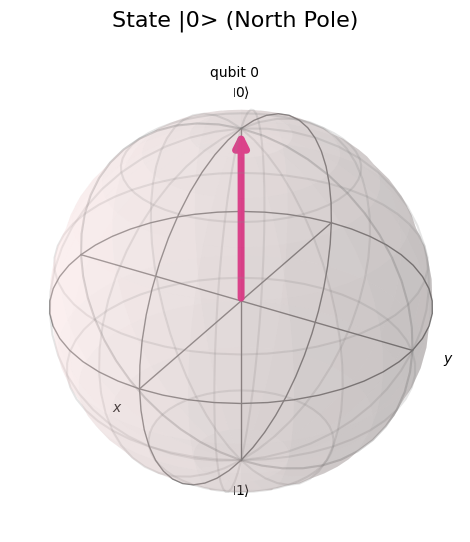

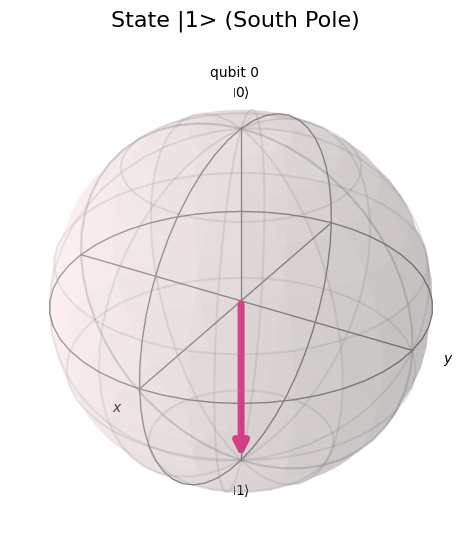

In [3]:
from qiskit.visualization import plot_bloch_multivector

# Task 3.1: Define |0> and |1> (The Poles)
state_0 = Statevector.from_label('0')
state_1 = Statevector.from_label('1')

# Plot them
display(plot_bloch_multivector(state_0, title="State |0> (North Pole)"))
display(plot_bloch_multivector(state_1, title="State |1> (South Pole)"))

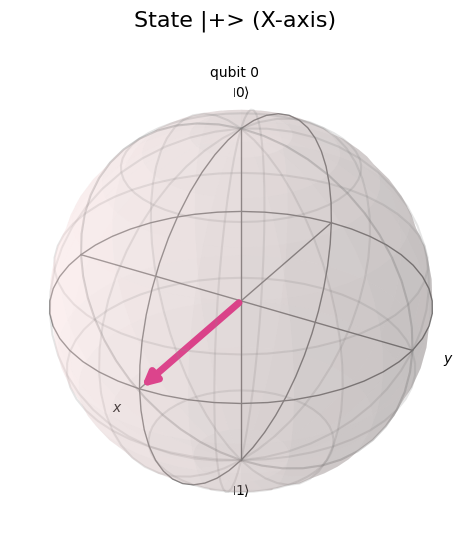

In [4]:
# Task 3.2: The Equator (|+>)
# State |+> = 1/sqrt(2) * (|0> + |1>)
state_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])

display(plot_bloch_multivector(state_plus, title="State |+> (X-axis)"))

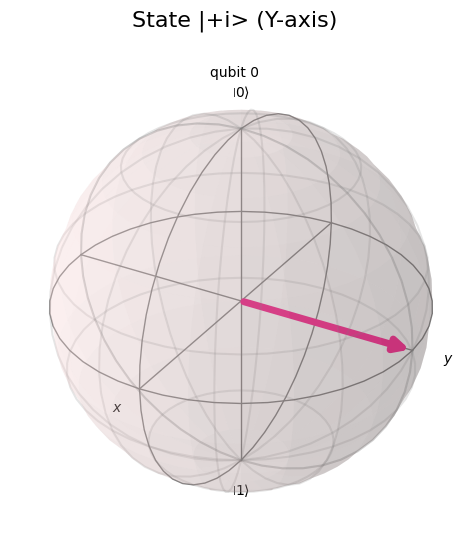

In [5]:
# Task 3.3: Circular Polarization (|+i>)
# State |+i> = 1/sqrt(2) * (|0> + i|1>)
# In Python, 'j' is the imaginary unit
state_i = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])

display(plot_bloch_multivector(state_i, title="State |+i> (Y-axis)"))

### Part 4: Your First Circuit

We will build a circuit that creates the diagonal state $|+\rangle$ using the **Hadamard Gate (H)**.

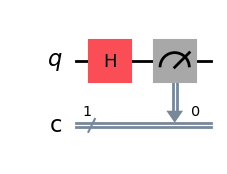

In [6]:
from qiskit import QuantumCircuit

# 1. Create a Quantum Circuit with 1 Qubit and 1 Classical Bit
qc = QuantumCircuit(1, 1)

# 2. Apply the H gate (rotates Z -> X)
qc.h(0)

# 3. Measure
qc.measure(0, 0)

# 4. Draw
qc.draw('mpl')

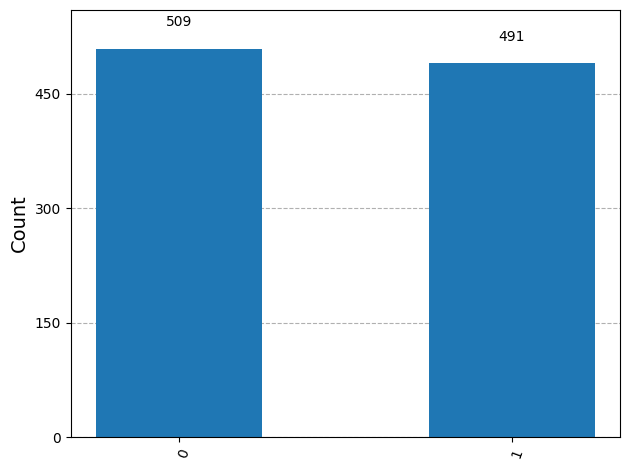

In [7]:
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

# Run the simulation
sampler = StatevectorSampler()
job = sampler.run([qc], shots=1000)
result = job.result()[0]
counts = result.data.c.get_counts()

plot_histogram(counts)